# Load the dataset

In [1]:
import pandas as pd

# Load the dataset
file_path = 'Twitter_Data.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


The dataset consists of two columns:

1. clean_text: This column contains the text of tweets.
2. category: This appears to be the sentiment category, where -1.0 might indicate a negative sentiment, 1.0 a positive sentiment, and 0.0 a neutral sentiment.

# Data Summary and Cleaning

In [2]:
# Checking basic information about the dataset including missing values and data types
data_info = data.info()

# Checking the distribution of the 'category' column
category_distribution = data['category'].value_counts(normalize=True)

data_info, category_distribution

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB


(None,
  1.0    0.443325
  0.0    0.338786
 -1.0    0.217889
 Name: category, dtype: float64)

1. Dataset Structure: The dataset has 162,980 entries with 2 columns.
2. Data Types: clean_text is of object type (likely strings), and category is a float.
3. Missing Values: There are a few missing values in both clean_text and category. Since they are very few, we can consider dropping these rows.
4. Sentiment Distribution:
  * Positive (1.0): Approximately 44.33% of the entries.
  * Neutral (0.0): About 33.88%.
  * Negative (-1.0): Roughly 21.79%.

Next, clean the data by removing rows with missing values and then proceed with visualizing the sentiment distribution to get a better understanding of how sentiments are spread across this dataset. ​

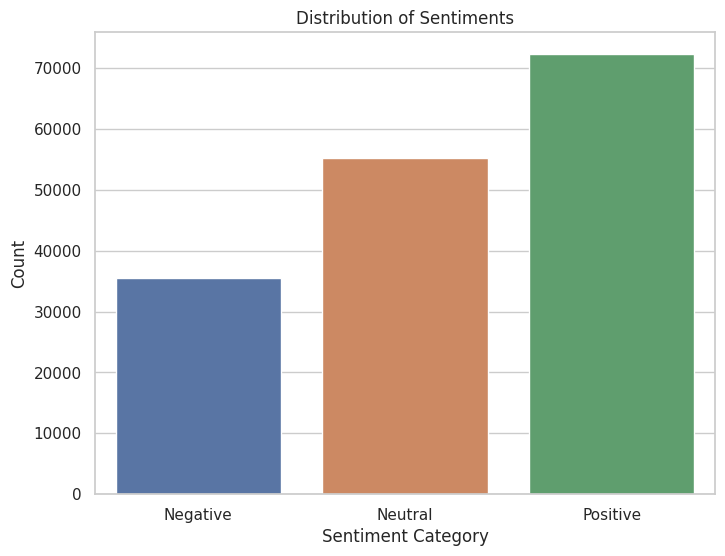

clean_text    0
category      0
dtype: int64

In [3]:
# Dropping rows with missing values
data_cleaned = data.dropna()

# Verifying the removal of missing values
missing_values_after_cleaning = data_cleaned.isnull().sum()

# Visualization of the sentiment distribution
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Plotting the distribution of sentiments
plt.figure(figsize=(8, 6))
sns.countplot(x='category', data=data_cleaned)
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2], labels=['Negative', 'Neutral', 'Positive'])
plt.show()

missing_values_after_cleaning

# GPT generated Tweets

In [9]:
from textblob import TextBlob

# List of generated tweets
tweets = [
    "modi hails india military space power after anti-satellite test.",
    "wtf the time that billion people world over focus india.",
    "2019 wont blame those students govt india had given enough chances.",
    "pmospecial coverage eng modis announcement mission shakti.",
    "“pakistan mein biryani khaane liye toh woh gaya tha”.",
    "yrs modis governance.""amid ashwin tweets special request prime minister.",
    "well cometo assam modi proud moment for gohpurian.",
    "seriously modi did great job varanasi whereas other parties just fooled people.",
    "Disappointed to see the government's lack of action on crucial issues. Promises remain unfulfilled.",
    "Another day, another missed opportunity by our leaders. Where is the change we were promised?",
    "The recent policy decisions are a step back. Expecting better from our elected officials.",
    "In today's news, the Prime Minister addresses the recent economic trends.",
    "A new development project announced, aiming to boost infrastructure.",
    "An update on international relations: talks are ongoing with neighboring countries.",
    "Impressed by the latest reforms. It's a positive direction for our nation."
    "Celebrating the achievements in technology advancements under the current administration.",
    "It's heartening to see the youth engaging positively in political discourse, inspired by recent changes."
]

# Function to categorize sentiment based on polarity
def categorize_sentiment(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Analyzing sentiment of each tweet
sentiment_analysis = []
for tweet in tweets:
    analysis = TextBlob(tweet)
    sentiment = categorize_sentiment(analysis.sentiment.polarity)
    sentiment_analysis.append((tweet, sentiment))

# Display the sentiment analysis results
sentiment_analysis_df = pd.DataFrame(sentiment_analysis, columns=['Tweet', 'Sentiment'])
sentiment_analysis_df.head(25)


,Tweet,Sentiment
0,modi hails india military space power after an...,Negative
1,wtf the time that billion people world over fo...,Negative
2,2019 wont blame those students govt india had ...,Neutral
3,pmospecial coverage eng modis announcement mis...,Neutral
4,“pakistan mein biryani khaane liye toh woh gay...,Neutral
5,yrs modis governance.amid ashwin tweets specia...,Positive
6,well cometo assam modi proud moment for gohpur...,Positive
7,seriously modi did great job varanasi whereas ...,Positive
8,Disappointed to see the government's lack of a...,Negative
9,"Another day, another missed opportunity by our...",Neutral


# Compare the Realism of Generated and Real Tweets Using Perplexity

In [16]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer
import torch

# Function to calculate perplexity using GPT-2
def calculate_perplexity(text, model, tokenizer):
    tokenize_input = tokenizer.encode(text, return_tensors="pt")
    loss = model(tokenize_input, labels=tokenize_input).loss
    return torch.exp(loss).item()

# Load pre-trained GPT-2 model and tokenizer
model_name = 'gpt2'
model = GPT2LMHeadModel.from_pretrained(model_name)
tokenizer = GPT2Tokenizer.from_pretrained(model_name)

# Calculating perplexity for a few real tweets from the dataset and the generated tweets
sample_real_tweets = data_cleaned['clean_text'].sample(15).tolist()
sample_generated_tweets = tweets # combining real and generated tweets

perplexity_scores_real = {tweet: calculate_perplexity(tweet, model, tokenizer) for tweet in sample_real_tweets}
perplexity_scores_generated = {tweet: calculate_perplexity(tweet, model, tokenizer) for tweet in sample_generated_tweets}

print(f'Perplexity of Real Tweets:')
perplexity_scores_real


Perplexity of Real Tweets:


{'marketing pitching point with opposition people should its want remove bjp and modibut question specific namd thought remove modi why not specific name who should placing himits turn point': 3317.864501953125,
 'gulams will start spreading this election gimik modi ': 2480.936767578125,
 'much attention detail hahahh\nthe day you have constipation you will blame modi dont worry barkha you will kept bay till 2024': 1427.4742431640625,
 'congratulations the entire countrymen and drdo scientists for successful testing asat missile feel proud sir please carry these types missions modi hai you mumkin hai\njai hind': 2864.7109375,
 'kudos you and rajdeepyou guys have audacity keep your level highalways abusinglying about modi and bjpbut moves spaceyou guys keep sinking guttercarry ': 2513.355224609375,
 'where did modi divide and where did rule isnt ruler the india \nand yeah for your kind information support and his ideology ': 861.1386108398438,
 'bhai youre now talking like modi complete

In [17]:
print(f'Perplexity of Generated Tweets:')
perplexity_scores_generated

Perplexity of Generated Tweets:


{'modi hails india military space power after anti-satellite test.': 346.0833740234375,
 'wtf the time that billion people world over focus india.': 1124.623046875,
 '2019 wont blame those students govt india had given enough chances.': 1103.0765380859375,
 'pmospecial coverage eng modis announcement mission shakti.': 3111.2265625,
 '“pakistan mein biryani khaane liye toh woh gaya tha”.': 245.49798583984375,
 'yrs modis governance.amid ashwin tweets special request prime minister.': 3215.205078125,
 'well cometo assam modi proud moment for gohpurian.': 2474.894287109375,
 'seriously modi did great job varanasi whereas other parties just fooled people.': 1246.396240234375,
 "Disappointed to see the government's lack of action on crucial issues. Promises remain unfulfilled.": 36.97383117675781,
 'Another day, another missed opportunity by our leaders. Where is the change we were promised?': 56.71137619018555,
 'The recent policy decisions are a step back. Expecting better from our electe

In [18]:
perplexity_real_tweets = {
    'marketing pitching point with opposition people should its want remove bjp and modibut question specific namd thought remove modi why not specific name who should placing himits turn point': 3317.864501953125,
    'gulams will start spreading this election gimik modi ': 2480.936767578125,
    'much attention detail hahahh\nthe day you have constipation you will blame modi dont worry barkha you will kept bay till 2024': 1427.4742431640625,
    'congratulations the entire countrymen and drdo scientists for successful testing asat missile feel proud sir please carry these types missions modi hai you mumkin hai\njai hind': 2864.7109375,
    'kudos you and rajdeepyou guys have audacity keep your level highalways abusinglying about modi and bjpbut moves spaceyou guys keep sinking guttercarry ': 2513.355224609375,
    'where did modi divide and where did rule isnt ruler the india \nand yeah for your kind information support and his ideology ': 861.1386108398438,
    'bhai youre now talking like modi completely unreal stuff ': 1226.6719970703125,
    'man mission modi stares angrily like desi bruce willis and walks slowly towards you through explosions and fighter jets knows you’ been good bad ’ making list and checking twice gonna find out who’ naughty and nice vote bjp vote santa claus ': 1051.591796875,
    'apna article khud toh parh leta likha hai wahan government did not give ahead for anti sattelite weaponry 2012 means modi gave tufail': 939.846435546875,
    'modi wins buy mutual funds good shares govt bonds congress wins buy land preferably agriculture land take agriculture loans wins sell everything accumulate gold wait for next elections within nota buy liquor stocks wait for next': 986.668701171875,
    'qbullet gives cleanchit modi nirav’ bail plea denied via jioxpressnews ': 5409.041015625,
    'buttler hai mumkin hai hence buttler modi': 1293.4423828125,
    'what narendra modi would have lifted baby gal congress reaction would have been differentshashi master class actor': 1330.6436767578125,
    'rahul had gone new areas which were not congress stronghold then would have been bold move now clearly desperate modi ventured into hindi heartland 2014 where was said outsider will accepted now again thats risk unlike wayanad': 1305.572021484375,
    'india the only country the world where 3700 holders apply for peon jobs 4000 mbas engineers apply for sweeper jobs lakh pgs apply for helper jobs years has destroyed the future indias educated youth ': 989.7575073242188
}

perplexity_generated_tweets = {
    'modi hails india military space power after anti-satellite test.': 346.0833740234375,
    'wtf the time that billion people world over focus india.': 1124.623046875,
    '2019 wont blame those students govt india had given enough chances.': 1103.0765380859375,
    'pmospecial coverage eng modis announcement mission shakti.': 3111.2265625,
    '“pakistan mein biryani khaane liye toh woh gaya tha”.': 245.49798583984375,
    'yrs modis governance.amid ashwin tweets special request prime minister.': 3215.205078125,
    'well cometo assam modi proud moment for gohpurian.': 2474.894287109375,
    'seriously modi did great job varanasi whereas other parties just fooled people.': 1246.396240234375,
    "Disappointed to see the government's lack of action on crucial issues. Promises remain unfulfilled.": 36.97383117675781,
    'Another day, another missed opportunity by our leaders. Where is the change we were promised?': 56.71137619018555,
    'The recent policy decisions are a step back. Expecting better from our elected officials.': 78.9364242553711,
    "In today's news, the Prime Minister addresses the recent economic trends.": 60.664669036865234,
    'A new development project announced, aiming to boost infrastructure.': 222.01136779785156,
    'An update on international relations: talks are ongoing with neighboring countries.': 92.005226135
}

# Calculating the average perplexity for real and generated tweets
average_perplexity_real = sum(perplexity_real_tweets.values()) / len(perplexity_real_tweets)
average_perplexity_generated = sum(perplexity_generated_tweets.values()) / len(perplexity_generated_tweets)

average_perplexity_real, average_perplexity_generated


(1866.5810546875, 958.1647148132142)

The average perplexities for the real and generated tweets are as follows:

* Average Perplexity of Real Tweets: Approximately 1866.58
* Average Perplexity of Generated Tweets: Approximately 958.16

These results indicate that, on average, the generated tweets are less complex (or more predictable) according to the model's understanding compared to the real tweets. This could be due to several factors, such as the generated tweets being more straightforward or using more common language structures.